In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("hate_speech.csv")

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub("\d+", "", text)
    return text

df["clean_tweet"] = df["tweet"].apply(preprocess_text)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df["clean_tweet"])
y = df["class"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = MultinomialNB()

# Train models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

# Evaluate models
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("\nNaïve Bayes Report:\n", classification_report(y_test, y_pred_nb))


Random Forest Accuracy: 0.8957030461972968
Decision Tree Accuracy: 0.8763364938470849
Naïve Bayes Accuracy: 0.8404276780310672

Random Forest Report:
               precision    recall  f1-score   support

           0       0.54      0.15      0.23       290
           1       0.92      0.96      0.94      3832
           2       0.82      0.87      0.84       835

    accuracy                           0.90      4957
   macro avg       0.76      0.66      0.67      4957
weighted avg       0.88      0.90      0.88      4957


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.32      0.26      0.28       290
           1       0.92      0.93      0.93      3832
           2       0.82      0.83      0.82       835

    accuracy                           0.88      4957
   macro avg       0.69      0.67      0.68      4957
weighted avg       0.87      0.88      0.87      4957


Naïve Bayes Report:
               precision    recall  f1-sco

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


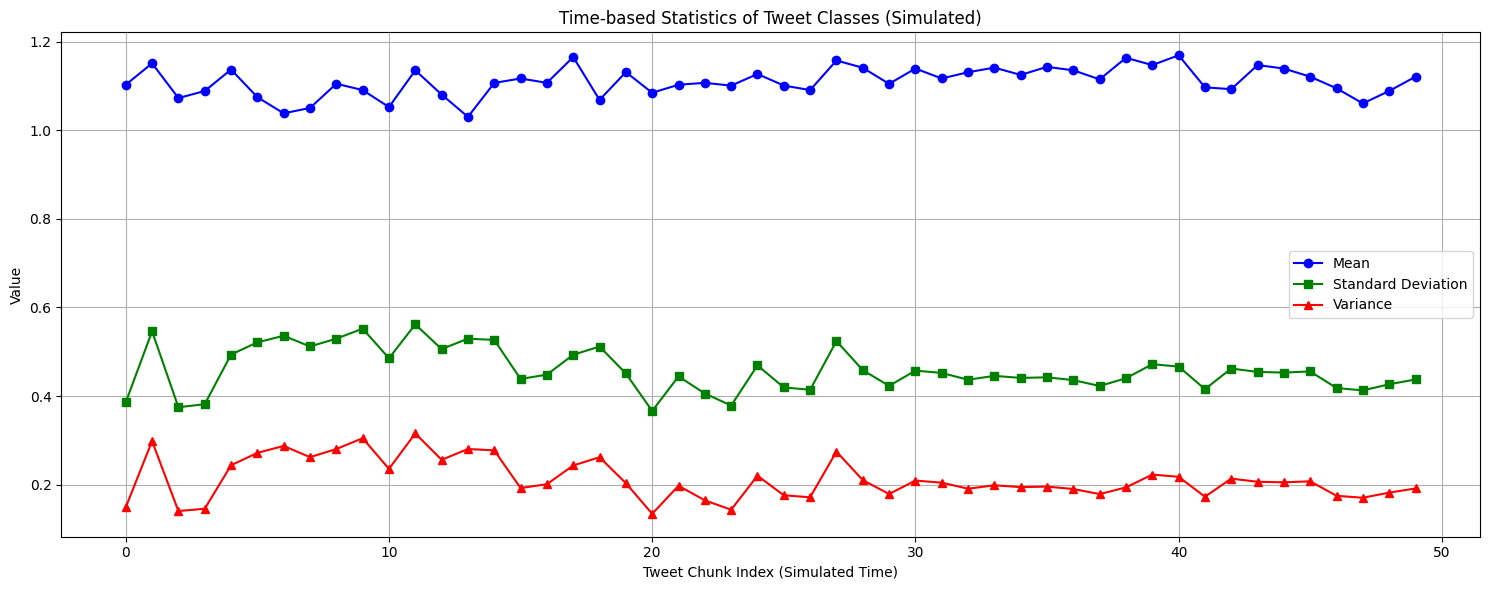

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("hate_speech.csv")

# Step 3: Simulate time by dividing data into chunks
num_bins = 50
df['chunk'] = pd.cut(df.index, bins=num_bins, labels=False)

# Step 4: Calculate statistics per chunk
stats_df = df.groupby('chunk')['class'].agg(['mean', 'std', 'var']).reset_index()

# Step 5: Plotting Mean, Standard Deviation, and Variance
plt.figure(figsize=(15, 6))

plt.plot(stats_df['chunk'], stats_df['mean'], label='Mean', color='blue', marker='o')
plt.plot(stats_df['chunk'], stats_df['std'], label='Standard Deviation', color='green', marker='s')
plt.plot(stats_df['chunk'], stats_df['var'], label='Variance', color='red', marker='^')

plt.title("Time-based Statistics of Tweet Classes (Simulated)")
plt.xlabel("Tweet Chunk Index (Simulated Time)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


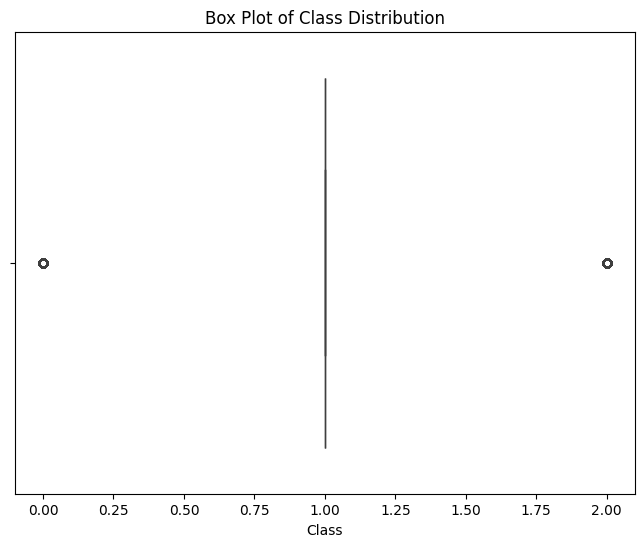

In [ ]:
# Box plot of class distribution
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["class"])
plt.title("Box Plot of Class Distribution")
plt.xlabel("Class")
plt.show()

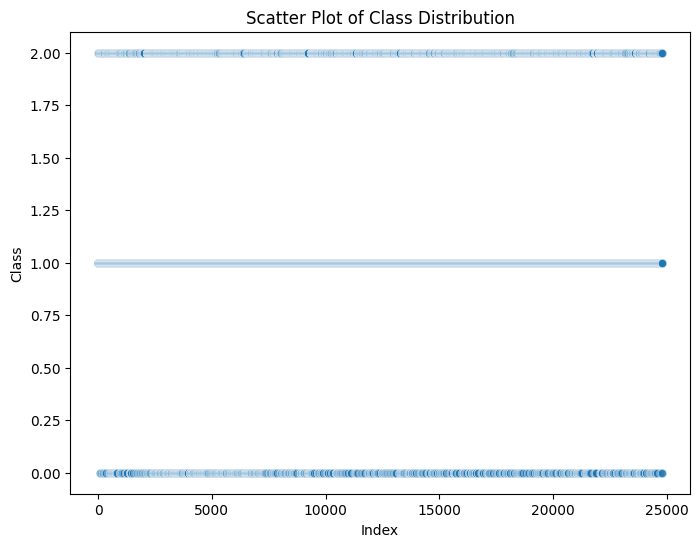

In [ ]:
# Scatter plot of class distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(x=range(len(df)), y=df["class"], alpha=0.5)
plt.title("Scatter Plot of Class Distribution")
plt.xlabel("Index")
plt.ylabel("Class")
plt.show()

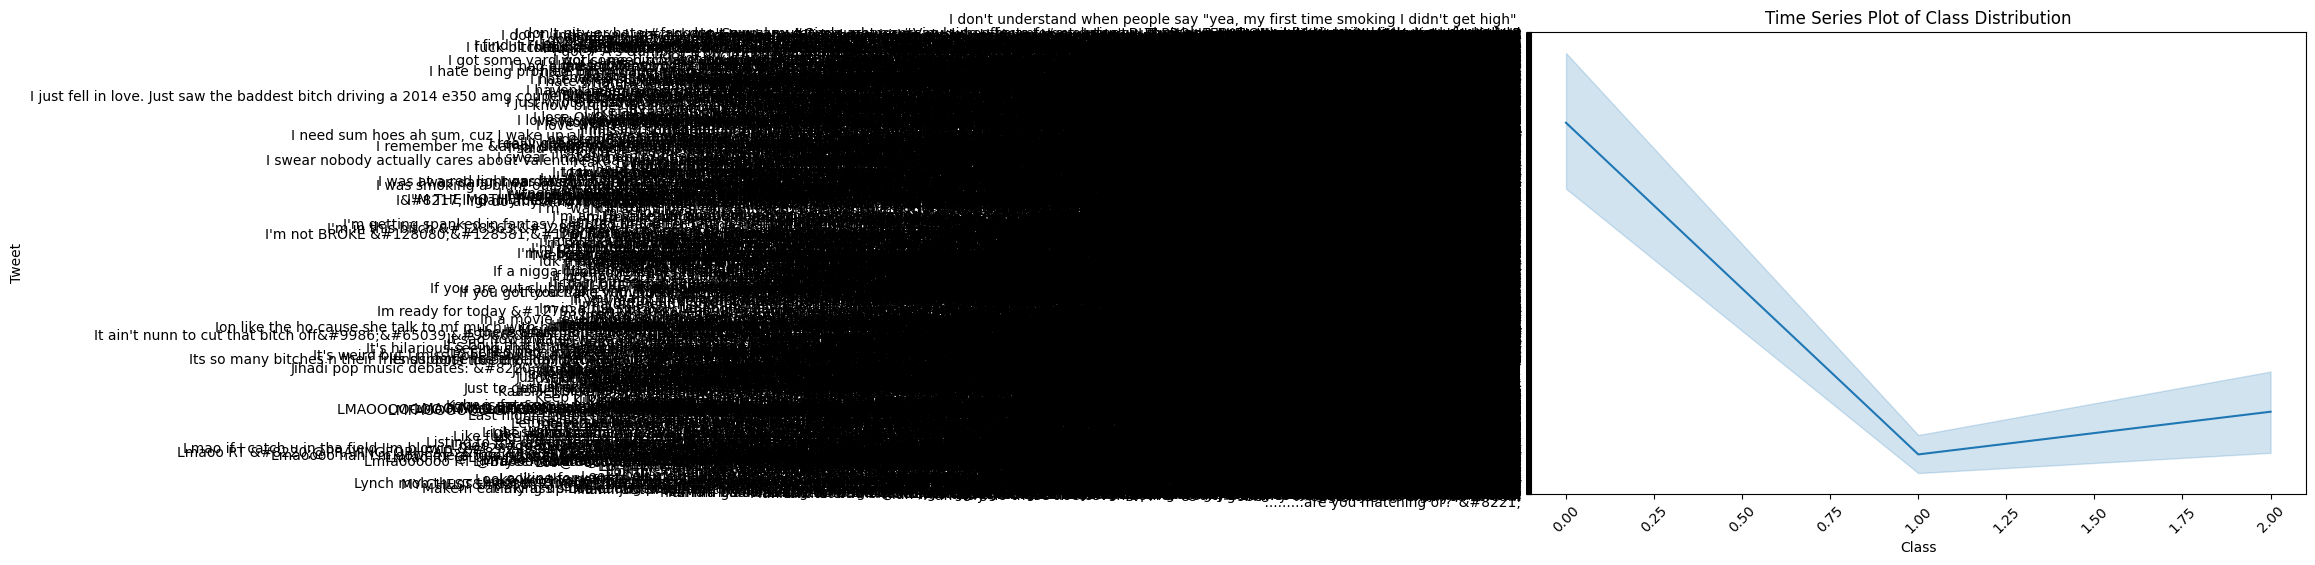

In [ ]:
# Time series plot of class distribution
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["class"], y=df["tweet"]) # Changed x to 'date' column.
plt.title("Time Series Plot of Class Distribution")
plt.xlabel("Class")
plt.ylabel("Tweet")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mean Squared Error
print("\nRandom Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Naïve Bayes MSE:", mean_squared_error(y_test, y_pred_nb))


Random Forest MSE: 0.1278999394795239
Decision Tree MSE: 0.158765382287674
Naïve Bayes MSE: 0.16743998386120637


In [ ]:
# Mean Absolute Error
print("\nRandom Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Naïve Bayes MAE:", mean_absolute_error(y_test, y_pred_nb))


Random Forest MAE: 0.1121646156949768
Decision Tree MAE: 0.13536413153116805
Naïve Bayes MAE: 0.162194875933024


In [ ]:
# R-squared Score
print("\nRandom Forest R^2:", r2_score(y_test, y_pred_rf))
print("Decision Tree R^2:", r2_score(y_test, y_pred_dt))
print("Naïve Bayes R^2:", r2_score(y_test, y_pred_nb))

In [ ]:
# Root Mean Squared Error
print("\nRandom Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Naïve Bayes RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nb)))


Random Forest RMSE: 0.3576310102319483
Decision Tree RMSE: 0.39845373920654076
Naïve Bayes RMSE: 0.40919431064129713


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("hate_speech.csv")

# Step 3: Convert to lists
tweets_list = df["tweet"].tolist()
labels_list = df["class"].tolist()

# Step 4: Create a feature matrix and label vector (using CountVectorizer as an example)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(tweets_list)  # Feature matrix
y = labels_list                            # Labels list

# Step 5: Print shapes and sample data
print("Feature matrix shape:", X.shape)
print("Sample feature vector (first tweet):", X[0].toarray())
print("Label for first tweet:", y[0])


Feature matrix shape: (24783, 35573)
Sample feature vector (first tweet): [[0 0 0 ... 0 0 0]]
Label for first tweet: 2


<Figure size 1400x600 with 0 Axes>

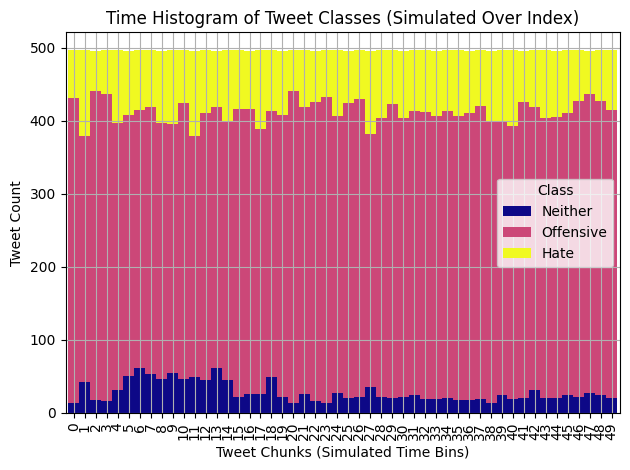

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load dataset
df = pd.read_csv("hate_speech.csv")

# Step 3: Create bins to simulate time (e.g., divide into 50 chunks)
num_bins = 50
df['chunk'] = pd.cut(df.index, bins=num_bins, labels=False)

# Step 4: Count tweets in each class per chunk
hist_data = df.groupby(['chunk', 'class']).size().unstack(fill_value=0)

# Step 5: Plotting the histogram
plt.figure(figsize=(14, 6))
hist_data.plot(kind='bar', stacked=True, colormap='plasma', width=1.0)
plt.title("Time Histogram of Tweet Classes (Simulated Over Index)")
plt.xlabel("Tweet Chunks (Simulated Time Bins)")
plt.ylabel("Tweet Count")
plt.legend(title="Class", labels=["Neither", "Offensive", "Hate"])
plt.tight_layout()
plt.grid(True)
plt.show()


Overall Skewness of Tweet Classes: 0.3881692386911882


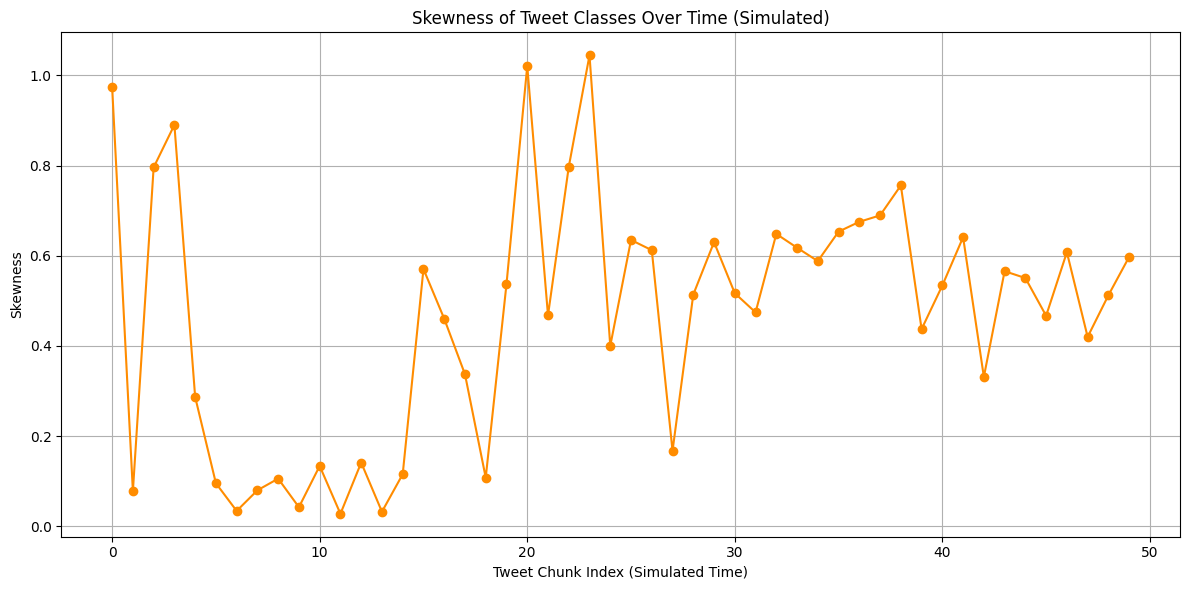

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

# Step 2: Load dataset
df = pd.read_csv("hate_speech.csv")

# Step 3: Calculate overall skewness
overall_skewness = skew(df['class'])
print("Overall Skewness of Tweet Classes:", overall_skewness)

# Step 4: Simulate time by dividing data into chunks
num_bins = 50
df['chunk'] = pd.cut(df.index, bins=num_bins, labels=False)

# Step 5: Calculate skewness per chunk
skewness_per_chunk = df.groupby('chunk')['class'].apply(skew).reset_index(name='skewness')

# Step 6: Plotting skewness over simulated time
plt.figure(figsize=(12, 6))
plt.plot(skewness_per_chunk['chunk'], skewness_per_chunk['skewness'], marker='o', color='darkorange')
plt.title("Skewness of Tweet Classes Over Time (Simulated)")
plt.xlabel("Tweet Chunk Index (Simulated Time)")
plt.ylabel("Skewness")
plt.grid(True)
plt.tight_layout()
plt.show()


Overall Kurtosis of Tweet Classes: 1.2346680413970947


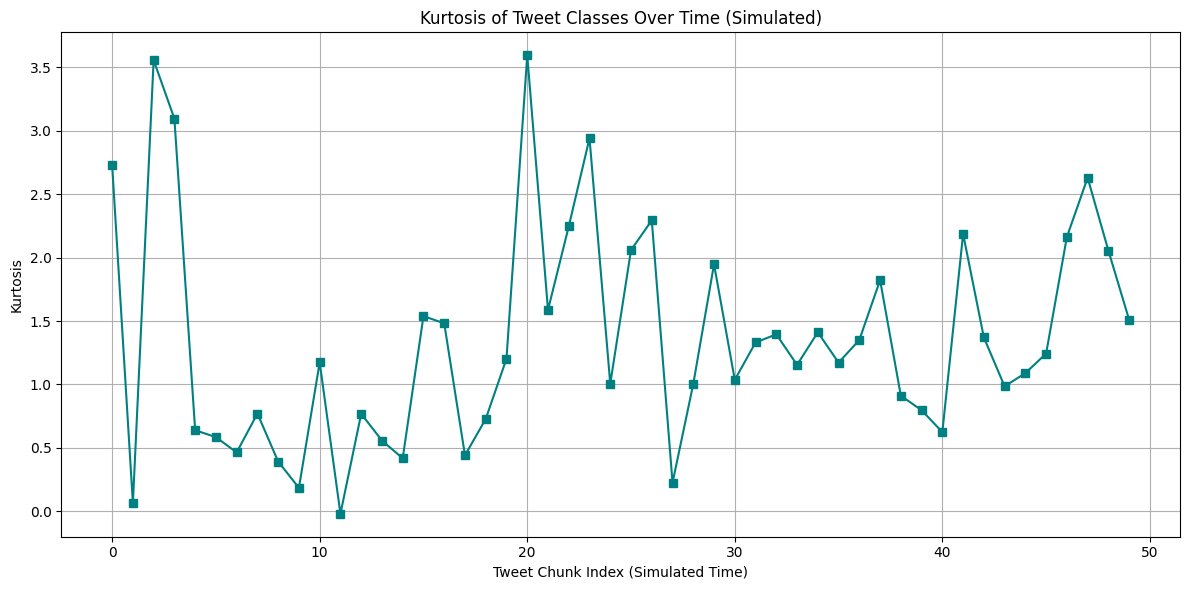

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# Step 2: Load dataset
df = pd.read_csv("hate_speech.csv")

# Step 3: Calculate overall kurtosis
overall_kurtosis = kurtosis(df['class'])
print("Overall Kurtosis of Tweet Classes:", overall_kurtosis)

# Step 4: Simulate time by dividing data into chunks
num_bins = 50
df['chunk'] = pd.cut(df.index, bins=num_bins, labels=False)

# Step 5: Calculate kurtosis per chunk
kurtosis_per_chunk = df.groupby('chunk')['class'].apply(kurtosis).reset_index(name='kurtosis')

# Step 6: Plotting kurtosis over simulated time
plt.figure(figsize=(12, 6))
plt.plot(kurtosis_per_chunk['chunk'], kurtosis_per_chunk['kurtosis'], marker='s', color='teal')
plt.title("Kurtosis of Tweet Classes Over Time (Simulated)")
plt.xlabel("Tweet Chunk Index (Simulated Time)")
plt.ylabel("Kurtosis")
plt.grid(True)
plt.tight_layout()
plt.show()


Accuracy: 0.8428484970748437

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.03      0.06       290
           1       0.96      0.87      0.92      3832
           2       0.57      0.98      0.72       835

    accuracy                           0.84      4957
   macro avg       0.60      0.63      0.56      4957
weighted avg       0.85      0.84      0.83      4957



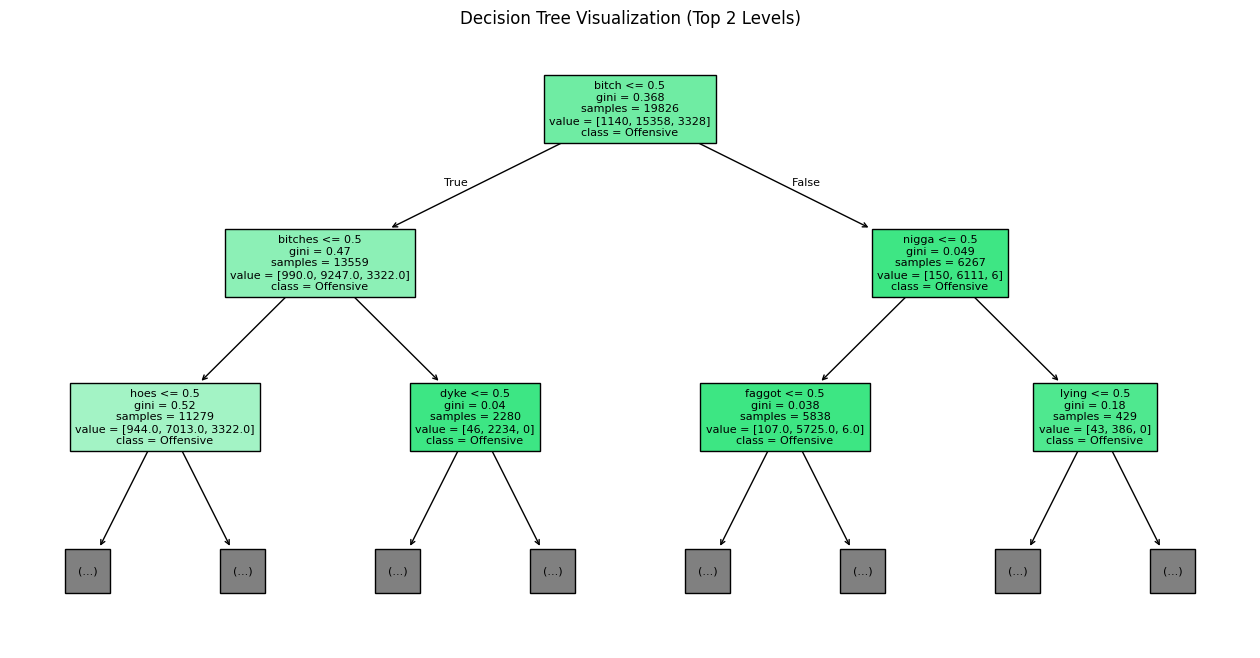

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Step 2: Load dataset
df = pd.read_csv("hate_speech.csv")

# Step 3: Vectorize tweet text
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['tweet'])
y = df['class']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize part of the decision tree
plt.figure(figsize=(16, 8))
tree.plot_tree(clf, max_depth=2, feature_names=vectorizer.get_feature_names_out(), class_names=["Neither", "Offensive", "Hate"], filled=True, fontsize=8)
plt.title("Decision Tree Visualization (Top 2 Levels)")
plt.show()


Accuracy: 0.8745208795642526

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.27      0.32       290
           1       0.91      0.95      0.93      3832
           2       0.82      0.75      0.78       835

    accuracy                           0.87      4957
   macro avg       0.71      0.65      0.68      4957
weighted avg       0.86      0.87      0.87      4957



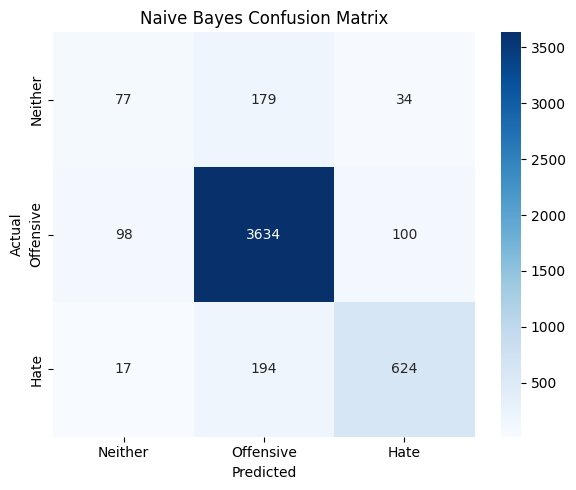

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv("hate_speech.csv")

# Step 3: Vectorize tweet text
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['tweet'])
y = df['class']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Neither", "Offensive", "Hate"],
            yticklabels=["Neither", "Offensive", "Hate"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.tight_layout()
plt.show()


Naive Bayes Accuracy: 0.8745
Decision Tree Accuracy: 0.8428
Logistic Regression Accuracy: 0.9026
Random Forest Accuracy: 0.8876


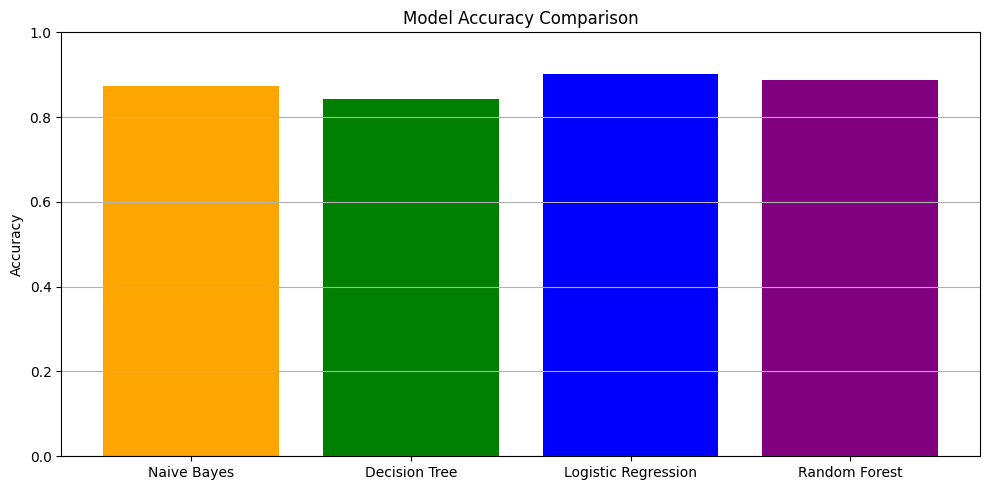

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load dataset
df = pd.read_csv("hate_speech.csv")

# Step 3: Text vectorization
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['tweet'])
y = df['class']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Step 6: Train, predict and collect accuracy scores
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Step 7: Visualize comparison
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['orange', 'green', 'blue', 'purple'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: give me a proper flowchart for the above all process

graph TD
    A[Start] --> B{Import Libraries};
    B --> C[Load Dataset];
    C --> D{Preprocess Text?};
    D -- Yes --> E[Preprocess Text];
    E --> F[Vectorize Text (TF-IDF)];
    D -- No --> F;
    F --> G[Split Dataset];
    G --> H{Train Models};
    H -- Random Forest --> I[Random Forest Training];
    H -- Decision Tree --> J[Decision Tree Training];
    H -- Naive Bayes --> K[Naive Bayes Training];
    I --> L[Random Forest Prediction];
    J --> M[Decision Tree Prediction];
    K --> N[Naive Bayes Prediction];
    L --> O[Evaluate Models (RF)];
    M --> P[Evaluate Models (DT)];
    N --> Q[Evaluate Models (NB)];
    O --> R[Print Results (RF)];
    P --> S[Print Results (DT)];
    Q --> T[Print Results (NB)];
    R --> U[Visualizations];
    S --> U;
    T --> U;
    U --> V[Calculate Metrics (MSE, MAE, R-squared, RMSE)];
    V --> W[Print Metrics];
    W --> X{Feature Matrix & Labels};
    X --> Y[Print shapes, sample data];
    Y --> Z[Time-based Analysis (Simulated)];
    Z --> AA[Plot time based stats];
    AA --> AB[Plot Class Dist. (Box, Scatter, Time series)];
    AB --> AC[Time Histogram];
    AC --> AD[Skewness over Time];
    AD --> AE[Kurtosis over Time];
    AE --> AF[Visualize Decision Tree];
    AF --> AG[Confusion Matrix (Naive Bayes)];
    AG --> AH[Model Comparison];
    AH --> I;
    AH --> J;
    AH --> K;
    AH --> AI[End]